In [683]:
# !pip install wfdb

In [684]:
import pandas as pd
import os
import wfdb
import matplotlib.pyplot as plt
import numpy as np
import numpy as geek
from scipy import signal
from scipy.signal import butter, filtfilt
import math
import scipy.integrate as integrate
from pylab import figure,clf,plot,xlabel,ylabel,title,grid,axes,show
from scipy.signal import find_peaks
from sklearn.model_selection import train_test_split
import tkinter as tk
from tkinter import filedialog
from tkinter import ttk
import re
import pickle
import os 


In [685]:

def readFile(folder_path = r'train'):
    df_data = pd.DataFrame()
    df_info = pd.DataFrame()
    # Specify the folder path
    o=0
    # Check if the folder exists
    if os.path.exists(folder_path):
        # Iterate through each file in the folder
        for file_names in os.listdir(folder_path):
            file_name = os.listdir(os.path.join(folder_path, file_names))[0]
            data_file = os.path.join(folder_path,file_names, file_name[:-4])
            signal_array, fields=wfdb.rdsamp(data_file)
            df_data[o]=signal_array[:,1][:115200]
            df_info[o]=fields
            o+=1
    return df_data,df_info




In [686]:
def load_model(model_filepath):
    with open(model_filepath, 'rb') as f:
        model = pickle.load(f)
    return model

In [687]:
df_data,df_info = readFile()
df_data

,0,1,2,3
0,-0.4135,-0.0695,0.2045,-1.0895
1,-0.4170,-0.0715,0.2025,-1.0925
2,-0.4235,-0.0755,0.2000,-1.0905
3,-0.4290,-0.0735,0.2035,-1.0895
4,-0.4305,-0.0735,0.2030,-1.0920
...,...,...,...,...
115195,0.3960,0.0185,1.0070,1.4930
115196,0.3910,0.0165,1.0090,1.5290
115197,0.3900,0.0155,1.0120,1.5730
115198,0.3925,0.0135,1.0140,1.6170


In [688]:
train, test = train_test_split(df_data, test_size=0.3, random_state=42,shuffle= False)


In [689]:
train

,0,1,2,3
0,-0.4135,-0.0695,0.2045,-1.0895
1,-0.4170,-0.0715,0.2025,-1.0925
2,-0.4235,-0.0755,0.2000,-1.0905
3,-0.4290,-0.0735,0.2035,-1.0895
4,-0.4305,-0.0735,0.2030,-1.0920
...,...,...,...,...
80635,0.0935,-0.1705,-0.0805,0.3990
80636,0.0845,-0.1670,-0.0810,0.3955
80637,0.0765,-0.1630,-0.0820,0.3965
80638,0.0725,-0.1615,-0.0845,0.3995


In [690]:
test


,0,1,2,3
80640,0.0755,-0.1640,-0.0895,0.3980
80641,0.0790,-0.1620,-0.0920,0.3940
80642,0.0820,-0.1620,-0.0920,0.3935
80643,0.0885,-0.1610,-0.0925,0.3910
80644,0.0945,-0.1575,-0.0915,0.3870
...,...,...,...,...
115195,0.3960,0.0185,1.0070,1.4930
115196,0.3910,0.0165,1.0090,1.5290
115197,0.3900,0.0155,1.0120,1.5730
115198,0.3925,0.0135,1.0140,1.6170


In [691]:
test_identified_as_1 = pd.concat([test[0][:900], test[1][:900*6] , test[2][:900], test[3][:900]], axis=0)

In [692]:
np.savetxt(f'test_identified_as_1',test_identified_as_1)

In [693]:
test_Not_identified = pd.concat([test[0][:850*2], test[1][:850*2] , test[2][:850*2], test[3][:850*2]], axis=0)

In [694]:
np.savetxt(f'test_Not_identified',test_Not_identified)

In [695]:
df_info

,0,1,2,3
fs,1000,1000,1000,1000
sig_len,115200,115200,120012,120012
n_sig,15,15,15,15
base_date,None,None,None,None
base_time,None,None,None,None
units,"[mV, mV, mV, mV, mV, mV, mV, mV, mV, mV, mV, m...","[mV, mV, mV, mV, mV, mV, mV, mV, mV, mV, mV, m...","[mV, mV, mV, mV, mV, mV, mV, mV, mV, mV, mV, m...","[mV, mV, mV, mV, mV, mV, mV, mV, mV, mV, mV, m..."
sig_name,"[i, ii, iii, avr, avl, avf, v1, v2, v3, v4, v5...","[i, ii, iii, avr, avl, avf, v1, v2, v3, v4, v5...","[i, ii, iii, avr, avl, avf, v1, v2, v3, v4, v5...","[i, ii, iii, avr, avl, avf, v1, v2, v3, v4, v5..."
comments,"[age: 57, sex: female, ECG date: 24/06/1992, D...","[age: 29, sex: male, ECG date: 16/07/1992, Dia...","[age: 34, sex: male, ECG date: 15/10/1996, Dia...","[age: 29, sex: male, ECG date: 17/10/1996, Dia..."


In [696]:
# df_info[0]['comments']

In [697]:
def butter_Banpass_filter(data,Low_Cutoff,High_Cutoff ,SamplingRate, order):
    nyq=0.5*SamplingRate
    low = Low_Cutoff / nyq
    high = High_Cutoff / nyq
    b, a = butter(order,[low,high],btype='band',analog=False,fs=None)
    Filtered_Data = filtfilt(b, a, data)
    return Filtered_Data

Filtered_signal = butter_Banpass_filter(df_data[0], Low_Cutoff=1 ,High_Cutoff=40 ,SamplingRate=df_info[0].fs, order=2)

In [698]:
Filtered_signal

array([-0.01374447, -0.01682074, -0.01982059, ..., -0.01472   ,
       -0.01332474, -0.01190143])

In [699]:
df_data[0]

0        -0.4135
1        -0.4170
2        -0.4235
3        -0.4290
4        -0.4305
           ...  
115195    0.3960
115196    0.3910
115197    0.3900
115198    0.3925
115199    0.3935
Name: 0, Length: 115200, dtype: float64

In [700]:
arr_x = np.array(range(0,Filtered_signal.shape[0]))
arr_y = np.array(Filtered_signal)
x= geek.diff(arr_x)
y=geek.diff(arr_y)
dy=np.zeros(Filtered_signal.shape[0])
dy[0:len(dy)-1] =y/x
print("First order difference  : ", dy)

First order difference  :  [-0.00307627 -0.00299985 -0.00285796 ...  0.00139527  0.0014233
  0.        ]


In [701]:
dy.shape

(115200,)

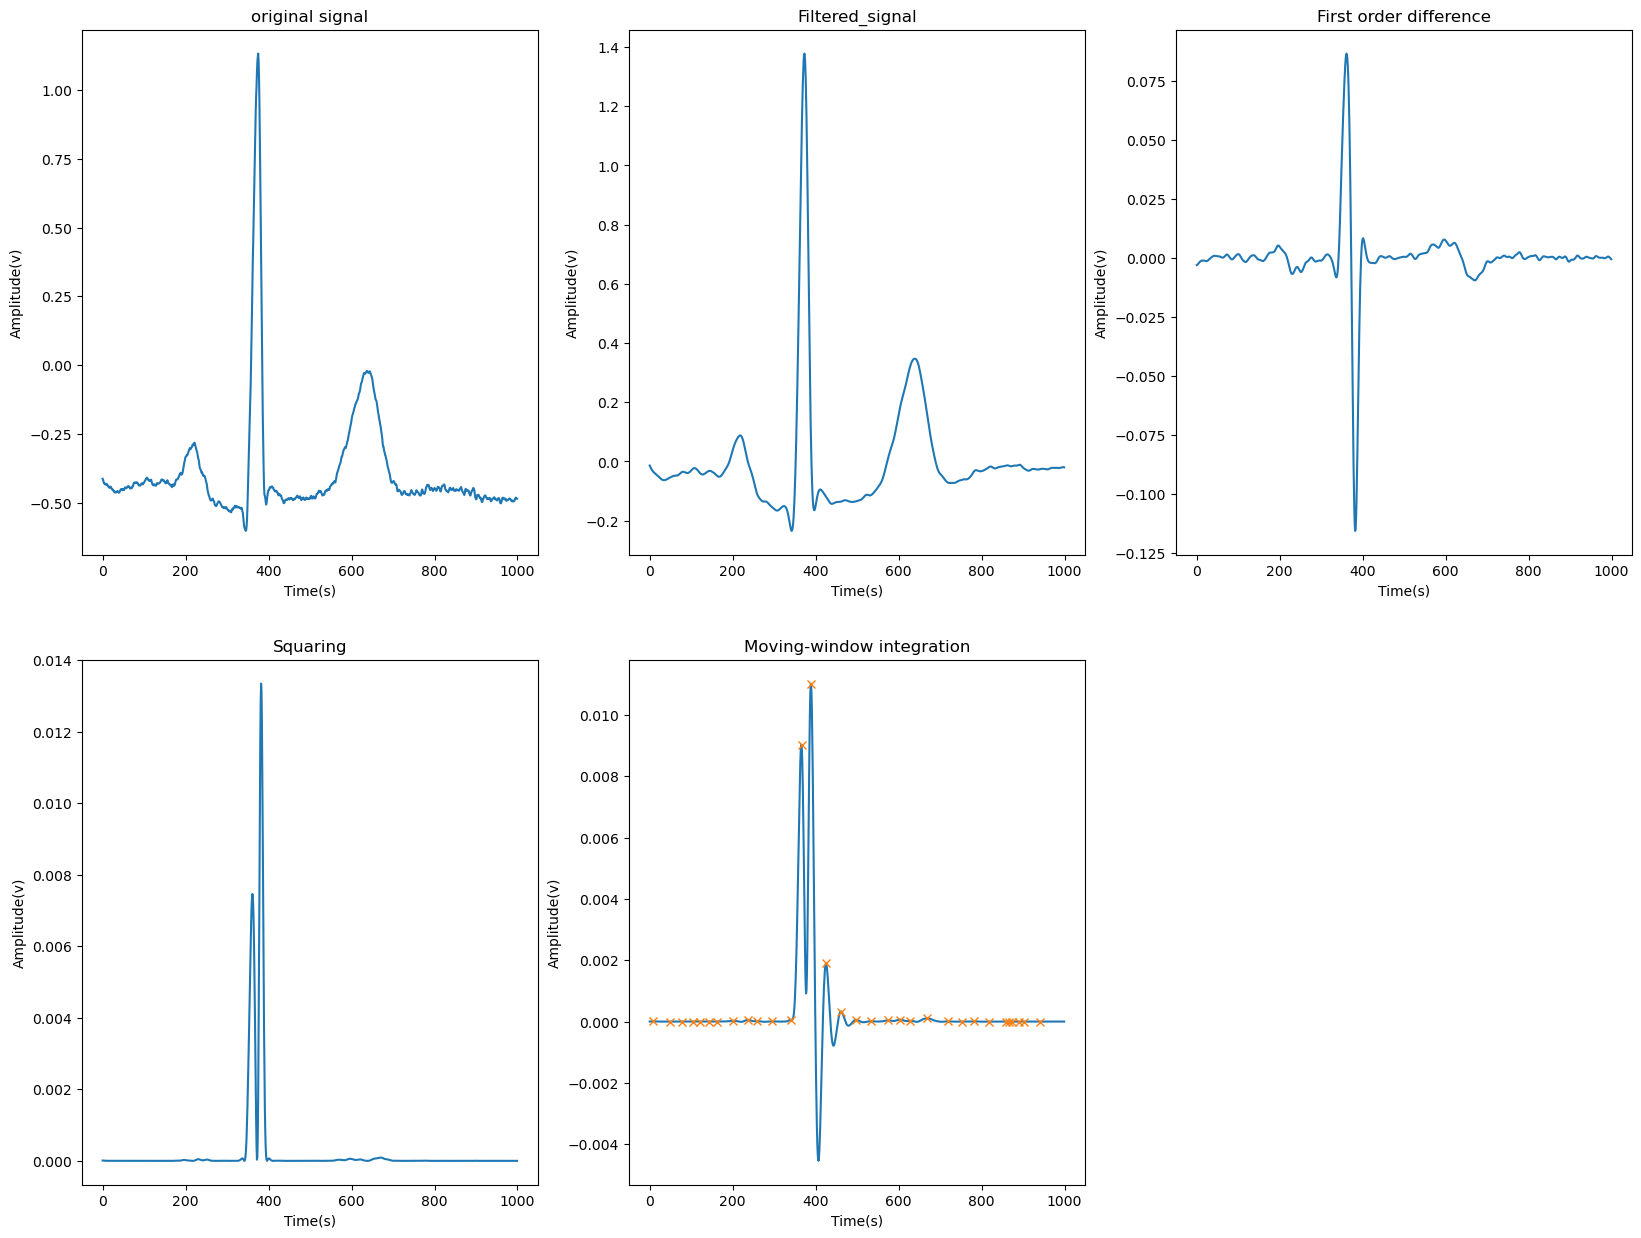

In [702]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))

# First subplot
plt.subplot(231)
plt.plot(range(0, Filtered_signal.shape[0])[:1000], df_data[0][:1000])
plt.title('original signal')
plt.xlabel("Time(s)")
plt.ylabel("Amplitude(v)")

# Second subplot
plt.subplot(232)
plt.plot(np.arange(0, len(Filtered_signal))[:1000], Filtered_signal[:1000])
plt.title('Filtered_signal')
plt.xlabel("Time(s)")
plt.ylabel("Amplitude(v)")

# Third subplot
plt.subplot(233)
plt.plot(np.arange(0, len(dy))[:1000], dy[:1000])
plt.title('First order difference')
plt.xlabel("Time(s)")
plt.ylabel("Amplitude(v)")


result=[dy[i]**2  for i in range(len(dy))]
plt.subplot(234)
plt.plot(np.arange(0,len(result))[:1000],result[:1000])
plt.title('Squaring')
plt.xlabel("Time(s)")
plt.ylabel("Amplitude(v)")


win_size =round(0.03 * 250);
sum = 0

for j in range(win_size):
    sum += result[j]/win_size
    result[j] = sum
    
# Apply the moving window integration using the equation given
for index in range(win_size,len(result)):  
    sum += result[index]/win_size
    sum -= result[index-win_size]/win_size
    result[index] = sum

plt.subplot(235)
plt.plot(np.arange(0,len(result))[:1000],result[:1000])
plt.title('Moving-window integration')
plt.xlabel("Time(s)")
plt.ylabel("Amplitude(v)")


peaks, _ = find_peaks(result[:1000])
X=[]
Y=[]
for i in range(len(peaks)-1):
    L=(peaks[i])
    Y.append(result[L])
    X.append(peaks[i])

plt.plot(X, Y, "x")

plt.show()


In [703]:
def get_P(Qrs_on,fs,signal):
    window = fs*0.15
    
    P = []
    for i in Qrs_on:
        place = int(i -  window)
        p_val = signal[place]
        p_indx = place
        for j in range(place,i):
            if signal[j] > p_val:
                p_val = signal[j]
                p_indx = j
        P.append(p_indx)
    return np.array(P)


def get_T(QRS_offset,fs,signal):# Minimum point
    window = fs*0.4
    
    t = []
    for i in QRS_offset:
        place = int(i +  window)
        t_val = 3
        t_indx = 0
        for j in range(i,place):
            if (j+50) < len(signal):
                w1 = signal[j-50] - signal[j]
                w2 = signal[j] - signal[j+50]
                w=w1*w2
                
                if w < t_val: # Minimum point
                    t_val = w
                    t_indx = j
        t.append(t_indx)
    return np.array(t)

In [704]:
def find_onset_offset(X, Y, signal):
    
    a_norm =  np.linalg.norm(np.array(Y) - np.array(X))
    a = np.array([[X[0], X[1]], [Y[0], Y[1]]])

    c_x = X[0]
    prev_sigma_max = -1
    max_x = -1
    while True:
        if X[0] > Y[0]:
            if c_x <= Y[0]:
                return max_x
            c_x -= 1
        else:
            if c_x >= Y[0]:
                return max_x
            c_x += 1
        
        c = np.array([[X[0], X[1]], [c_x, signal[int(c_x)]]])
        
        ac_cross = np.cross(a, c)
        # [a[0][0](X_x)  a[0][1](X_y)      [c[0][0](X_x)  c[0][1](X_y)       
        #  a[1][0](Y_x)  a[1][1]](Y_y)      c[1][0](C_x)  c[1][1](C_y)]
        # 
        #   (X_x)-(Y_x)*(X_y)- (C_y)   -         (X_y)-(Y_y) * (X_x)-(C_x)
        m_cross = (a[0][0]-a[1][0]) * (c[0][1]-c[1][1]) - (a[0][1]-a[1][1]) * (c[0][0]-c[1][0])
        
        ac_norm = np.linalg.norm(ac_cross)
        sigma = ac_norm / a_norm
        if X[0] > Y[0]:
            sigma = m_cross
        else:
            sigma = -m_cross

        if sigma > prev_sigma_max:
            prev_sigma_max = sigma
            max_x = int(c_x)
            
            
def fun_onset_P(Qrs_on,fs,ecg_signal):
    downhill_points = []
    
    
    for i in range(Qrs_on, Qrs_on-100, -1):
        if ecg_signal[i] < ecg_signal[i - 1]:
            downhill_points.append(i)

    # Define line segments and compute cross product
    max_curvature = -np.inf
    onset_index = None
    for i in downhill_points:
        if i + 1 >= len(ecg_signal) or i - 1 < 0:
            continue  # Skip if index is out of bounds

        prev_segment = np.array([1, ecg_signal[i - 1]])
        current_segment = np.array([1, ecg_signal[i]])
        next_segment = np.array([1, ecg_signal[i + 1]])

        curvature = np.cross(current_segment - prev_segment, next_segment - current_segment)
        if curvature > max_curvature:
            max_curvature = curvature
            onset_index = i
    return np.array(onset_index)


def fun_offset(Qrs_on,fs,ecg_signal):
    downhill_points = []
    for i in range(Qrs_on,len(ecg_signal) - 1):
        if ecg_signal[i] < ecg_signal[i + 1]:
            downhill_points.append(i)

    # Define line segments and compute cross product
    max_curvature = -np.inf
    offset_index = None
    for i in downhill_points:
        if i + 1 >= len(ecg_signal) or i - 1 < 0:
            continue  # Skip if index is out of bounds

        prev_segment = np.array([1, ecg_signal[i - 1]])
        current_segment = np.array([1, ecg_signal[i]])
        next_segment = np.array([1, ecg_signal[i + 1]])

        curvature = np.cross(current_segment - prev_segment, next_segment - current_segment)
        if curvature > max_curvature:
            max_curvature = curvature
            offset_index = i
    return np.array(offset_index)

In [705]:
def onset_and_ofset(Qrs_on,fs,signal):
    window = fs*0.2
    p_onset = []
    p_offset = []
    
    for i in Qrs_on:
        #p_onset.append(fun_onset_P(i,fs,signal))
        #p_offset.append(fun_offset(i,fs,signal))
        x = [i ,signal[i]]
        y = [int(i-window),signal[int(i-window)]]
        val = find_onset_offset(x,y,signal)
        p_onset.append(val)
        y = [int(i+50),signal[int(i+50)]]
        val = find_onset_offset(x,y,signal)
        p_offset.append(val)
    return np.array(p_onset),np.array(p_offset)

def T_onset_and_ofset(Qrs_on,fs,signal):
    window = fs*0.2
    p_onset = []
    p_offset = []
    
    for i in Qrs_on:
        #p_onset.append(fun_onset_P(i,fs,signal))
        #p_offset.append(fun_offset(i,fs,signal))
        x = [i ,signal[i]]
        y = [int(i-window),signal[int(i-window)]]
        val = find_onset_offset(x,y,signal)
        p_onset.append(val)
        if int(i+window+40) > len(signal):
            y = [len(signal)-1,signal[len(signal)-1]]
        else:
            y = [int(i+window+40),signal[int(i+window+40)]]
        val = find_onset_offset(x,y,signal)
        p_offset.append(val)
    return np.array(p_onset),np.array(p_offset)

def Q_S_onset_ofset(Q_peaks,Filtered_signal,temps):
    QRS_offset=[]
    QRS_onset=[]
    Q=[]
    S=[]
    for i in Q_peaks:
        min_Q = temps[i]
        index_Q=0
        min_S = temps[i]
        index_S=0
        for v in range(i,len(temps)):
            if(Filtered_signal[v] < min_Q):
                index_Q=v
                min_Q = Filtered_signal[v] 
            if temps[v] < temps[i] * 0.2 :
                Q.append(index_Q)
                QRS_offset.append(v)
                break
            
        for v in range(i-1,0,-1):
            if(Filtered_signal[v] < min_S):
                index_S=v
                min_S = Filtered_signal[v]
            
            if temps[v] < temps[i] * 0.15 :
                
                QRS_onset.append(v)
                S.append(index_S)
                break
    return np.array(QRS_offset),np.array(QRS_onset),np.array(S),np.array(Q)

In [706]:
def angle_between_vectors(v1, v2):
    dot_product = np.dot(v1, v2)
    v1_magnitude = np.linalg.norm(v1)
    v2_magnitude = np.linalg.norm(v2)
    cosine_angle = dot_product / (v1_magnitude * v2_magnitude)
    angle = np.arccos(cosine_angle)
    return angle

In [707]:
def find_fidu(signal,fs,index_=-1):
    
    Filtered_signal = butter_Banpass_filter(signal, Low_Cutoff=1 ,High_Cutoff=40 ,SamplingRate=fs, order=2)
    
    
    arr_x = np.array(range(0,Filtered_signal.shape[0]))
    arr_y = np.array(Filtered_signal)
    x= np.diff(arr_x)
    y=np.diff(arr_y)
    dy=np.zeros(Filtered_signal.shape[0])
    dy[0:len(dy)-1] =y/x
    
    result=[dy[i]**2  for i in range(len(dy))]

    temps = np.convolve(result, np.ones(fs // 16),mode='same')
    
    
    R_peaks, _ = find_peaks(Filtered_signal[:index_], height=0.3*np.max(temps), distance=0.5*fs)
    
    output_List=[]
    QRS_offset,QRS_onset,Q,S=Q_S_onset_ofset(R_peaks,Filtered_signal,temps)
    
    
    P = get_P(QRS_onset,fs,Filtered_signal)
    p_onset,p_offset=onset_and_ofset(P,fs,Filtered_signal)
    output_List.extend(p_onset)
    output_List.extend(P)
    
    output_List.extend(p_offset)
    
    output_List.extend(QRS_onset)
    output_List.extend(Q)
    output_List.extend(R_peaks)
    output_List.extend(S)
   
    output_List.extend(QRS_offset)
    T =get_T(QRS_offset,fs,Filtered_signal)
    T_onset,T_offset=T_onset_and_ofset(T,fs,Filtered_signal)
    output_List.extend(T_onset)
    output_List.extend(T)
    
    output_List.extend(T_offset)
    _1 = R_peaks - Q
    _2 = S - R_peaks 
    _3 = p_offset - p_onset
    _4 = T_offset - T_onset
    _5 = Q-P
    _6 = S - Q
    _7 = T - S
    _8 = R_peaks - p_offset
    _9 = T_onset - R_peaks 
    _10 = R_peaks - P
    _11 = T - R_peaks
    _12 = S- P
    _13 = T - Q 
    _14 = R_peaks - p_onset
    _15 = T_offset  - R_peaks
    _16 = Q - p_onset
    _17 = T_offset - S
    _18 = QRS_onset - p_offset
    _19 =  T_onset - QRS_offset
    _20 = T_offset - p_offset
    _21 = T - P
    _22 = arr_y[R_peaks] - arr_y[Q]
    _23 = arr_y[T] - arr_y[P]
    _24 = arr_y[P] - arr_y[S]
    _25 = arr_y[P] - arr_y[Q]
    _26 = arr_y[P] - arr_y[p_onset]
    _27 = arr_y[R_peaks] - arr_y[P]
    _28 = arr_y[R_peaks] - arr_y[T]
    _29 = arr_y[Q] - arr_y[S]
    _30 = arr_y[T] - arr_y[T_offset]
    _31 = arr_y[T] - arr_y[Q]
    _32 = arr_y[T] - arr_y[S]
    _33 = arr_y[R_peaks] - arr_y[S]    
    _34 = []
    _35 = []
    _36 = []
    
    for start, end, end2 in zip(Q,P,R_peaks):
        # Start and end points of vectors
        start_v1 = np.array([start, arr_y[start]])
        end_v1 = np.array([end, arr_y[end]])
        
        start_v2 =  np.array([start, arr_y[start]])
        end_v2 = np.array([end2, arr_y[end2]])
        
        # Calculate vectors
        v1 = end_v1 - start_v1
        v2 = end_v2 - start_v2

        # Calculate angle between vectors
        angle_degrees = angle_between_vectors(v1, v2)
        _34.append(angle_degrees)
    
    for start, end, end2 in zip(S,T,R_peaks):
        # Start and end points of vectors
        start_v1 = np.array([start, arr_y[start]])
        
        end_v1 = np.array([end, arr_y[end]])
        start_v2 =  np.array([start, arr_y[start]])
        end_v2 = np.array([end2, arr_y[end2]])

        # Calculate vectors
        v1 = end_v1 - start_v1
        v2 = end_v2 - start_v2

        # Calculate angle between vectors
        angle_degrees = angle_between_vectors(v1, v2)
        _35.append(angle_degrees)
        
    
    
    for start, end, end2 in zip(R_peaks,Q,S):
        # Start and end points of vectors
        start_v1 = np.array([start, arr_y[start]])
        end_v1 = np.array([end, arr_y[end]])
        start_v2 =  np.array([start, arr_y[start]])
        end_v2 = np.array([end2, arr_y[end2]])

        # Calculate vectors
        v1 = end_v1 - start_v1
        v2 = end_v2 - start_v2

        # Calculate angle between vectors
        angle_degrees = angle_between_vectors(v1, v2)
        _36.append(angle_degrees)
        
        
    data = {
    '_1': _1,
    '_2': _2,
    '_3': _3,
    '_4': _4,
    '_5': _5,
    '_6': _6,
    '_7': _7,
    '_8': _8,
    '_9': _9,
    '_10': _10,
    '_11': _11,
    '_12': _12,
    '_13': _13,
    '_14': _14,
    '_15': _15,
    '_16': _16,
    '_17': _17,
    '_18': _18,
    '_19': _19,
    '_20': _20,
    '_21': _21,
    '_22': _22,
    '_23': _23,
    '_24': _24,
    '_25': _25,
    '_26': _26,
    '_27': _27,
    '_28': _28,
    '_29': _29,
    '_30': _30,
    '_31': _31,
    '_32': _32,
    '_33': _33,
    '_34': np.array(_34),
    '_35': np.array(_35),
    '_36': np.array(_36)
    }

    # Create DataFrame from the dictionary
    df = pd.DataFrame(data)

    return Filtered_signal,output_List,df

In [708]:
index_=-1
integrated_signal,peaks,df=find_fidu(df_data[0],df_info[0].fs,index_)
integrated_signal=np.array(integrated_signal)

In [709]:
df

,_1,_2,_3,_4,_5,_6,_7,_8,_9,_10,...,_27,_28,_29,_30,_31,_32,_33,_34,_35,_36
0,31,24,88,157,124,55,241,115,184,155,...,1.289759,1.030718,-0.069526,0.412689,0.581264,0.511738,1.542456,3.087041,3.075289,3.025459
1,31,24,100,180,111,55,251,108,178,142,...,1.363840,1.119807,-0.083267,0.379716,0.521077,0.437810,1.557617,3.086214,3.075039,3.023900
2,32,24,103,165,115,56,246,109,184,147,...,1.349446,1.093824,-0.086613,0.413982,0.518510,0.431897,1.525721,3.088964,3.076351,3.027764
3,30,24,84,159,126,54,240,115,176,156,...,1.303465,1.038011,-0.085991,0.389109,0.564318,0.478328,1.516338,3.085860,3.076503,3.025135
4,31,24,110,163,110,55,251,104,181,141,...,1.380507,1.112180,-0.079593,0.387631,0.557343,0.477750,1.589930,3.085162,3.073539,3.021639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,31,24,101,175,117,55,247,108,185,148,...,1.317466,1.067193,-0.063534,0.412149,0.507943,0.444408,1.511601,3.088623,3.076893,3.027925
123,30,24,105,168,114,54,247,111,180,144,...,1.362342,1.122313,-0.066663,0.417335,0.510199,0.443536,1.565849,3.084859,3.074646,3.022078
124,31,23,73,157,122,54,243,130,177,153,...,1.343266,1.101280,-0.064387,0.400043,0.559825,0.495438,1.596719,3.085455,3.070242,3.018748
125,31,24,102,185,116,55,251,105,174,147,...,1.321139,1.079574,-0.080491,0.403268,0.516848,0.436357,1.515931,3.087768,3.076774,3.027061


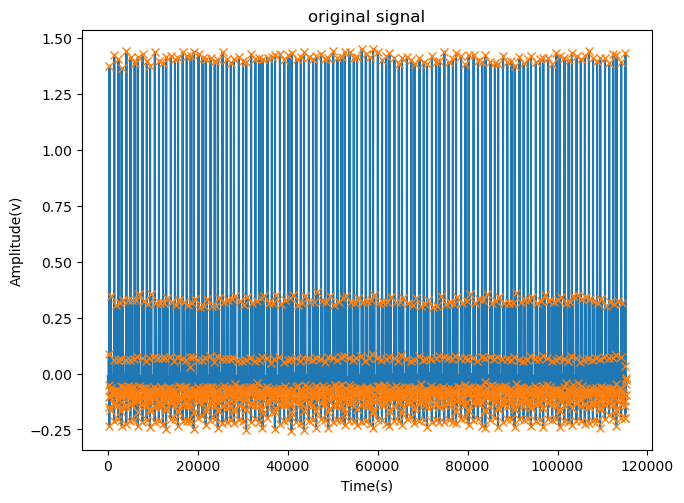

In [710]:
plt.figure(figsize=(25, 12))

# First subplot
plt.subplot(231)
plt.plot(range(0, integrated_signal.shape[0])[:index_], integrated_signal[:index_])
plt.title('original signal')
plt.xlabel("Time(s)")
plt.ylabel("Amplitude(v)")
X=[]
Y=[]
for i in range(len(peaks)):
    L=(peaks[i])
    Y.append(integrated_signal[L])
    X.append(peaks[i])

plt.plot(X, Y, "x")


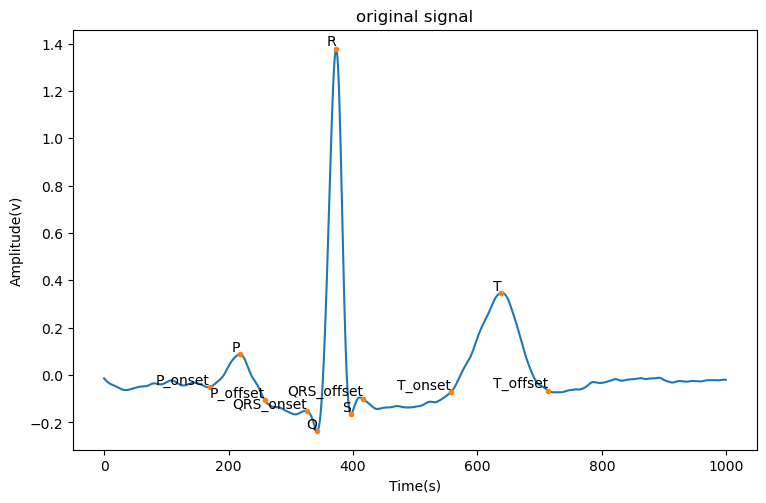

In [711]:
index_=1000
integrated_signal,peaks,df=find_fidu(df_data[0],df_info[0].fs,index_)
integrated_signal=np.array(integrated_signal)
plt.figure(figsize=(30, 12))

# First subplot
plt.subplot(231)
plt.plot(range(0, integrated_signal.shape[0])[:index_], integrated_signal[:index_])
plt.title('original signal')
plt.xlabel("Time(s)")
plt.ylabel("Amplitude(v)")
X=[]
Y=[]
labelss = ['P_onset','P','P_offset','QRS_onset','Q','R','S','QRS_offset','T_onset','T','T_offset']
for i in range(len(peaks)):
    L=(peaks[i])
    Y.append(integrated_signal[L])
    X.append(peaks[i])
    plt.text(X[-1], Y[-1], f'{labelss[i%11]}', fontsize=10, ha='right', va='bottom')  # Annotating with the peak names
    
    
plt.plot(X, Y, ".")


In [712]:
Data = pd.DataFrame()
for i in train.columns:
    index_=-1
    integrated_signal,peaks,df=find_fidu(df_data[i],df_info[0].fs,index_)
    df['label'] = [i]*df.shape[0]
    integrated_signal=np.array(integrated_signal)
    Data = pd.concat((Data, df), axis=0)

   

In [713]:
Data

,_1,_2,_3,_4,_5,_6,_7,_8,_9,_10,...,_28,_29,_30,_31,_32,_33,_34,_35,_36,label
0,31,24,88,157,124,55,241,115,184,155,...,1.030718,-0.069526,0.412689,0.581264,0.511738,1.542456,3.087041,3.075289,3.025459,0
1,31,24,100,180,111,55,251,108,178,142,...,1.119807,-0.083267,0.379716,0.521077,0.437810,1.557617,3.086214,3.075039,3.023900,0
2,32,24,103,165,115,56,246,109,184,147,...,1.093824,-0.086613,0.413982,0.518510,0.431897,1.525721,3.088964,3.076351,3.027764,0
3,30,24,84,159,126,54,240,115,176,156,...,1.038011,-0.085991,0.389109,0.564318,0.478328,1.516338,3.085860,3.076503,3.025135,0
4,31,24,110,163,110,55,251,104,181,141,...,1.112180,-0.079593,0.387631,0.557343,0.477750,1.589930,3.085162,3.073539,3.021639,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,28,27,61,258,117,55,18,113,27,145,...,0.774923,0.143306,-0.160272,-0.004169,0.139137,0.914060,3.112891,3.100022,3.080232,3
146,27,28,93,257,102,55,17,79,28,129,...,0.756666,0.124354,-0.178462,0.004554,0.128908,0.885574,3.112041,3.102393,3.081790,3
147,28,29,57,257,99,57,16,116,28,127,...,0.773544,0.121606,-0.185244,-0.021451,0.100156,0.873699,3.113363,3.105215,3.084620,3
148,28,29,95,256,91,57,16,76,29,119,...,0.807776,0.112069,-0.171890,-0.019388,0.092680,0.900456,3.111863,3.104760,3.082403,3


In [714]:
data_model_train, data_model_test = train_test_split(Data, test_size=0.3, random_state=42,shuffle=True)


In [715]:
data_model_train

,_1,_2,_3,_4,_5,_6,_7,_8,_9,_10,...,_28,_29,_30,_31,_32,_33,_34,_35,_36,label
47,35,29,104,165,163,64,274,163,215,198,...,0.683647,-0.020812,0.371923,0.496872,0.476061,1.159708,3.106283,3.099887,3.067908,2
1,27,29,79,256,114,56,16,91,29,141,...,0.825611,0.129514,-0.225598,-0.028425,0.101089,0.926700,3.110809,3.103330,3.080131,3
23,31,24,98,167,126,55,246,108,175,157,...,1.109794,-0.075835,0.402616,0.492695,0.416859,1.526653,3.087962,3.076373,3.026420,0
7,34,30,105,169,164,64,273,164,214,198,...,0.676509,-0.019365,0.376808,0.509028,0.489663,1.166172,3.105158,3.100946,3.067885,2
35,35,29,113,183,162,64,276,163,203,197,...,0.668741,-0.004734,0.371852,0.494937,0.490203,1.158944,3.106754,3.099874,3.068415,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,31,24,96,161,124,55,249,111,193,155,...,1.067419,-0.088513,0.419585,0.530721,0.442208,1.509626,3.087903,3.076998,3.027267,0
106,31,24,69,158,125,55,242,130,180,156,...,1.060925,-0.083968,0.421935,0.591295,0.507328,1.568252,3.085821,3.074245,3.023095,0
6,36,28,111,171,161,64,274,163,209,197,...,0.641785,-0.008380,0.376699,0.512321,0.503941,1.145726,3.107951,3.098857,3.068649,2
68,27,29,99,257,87,56,16,77,28,114,...,0.821768,0.133024,-0.186440,-0.029829,0.103195,0.924964,3.110289,3.103259,3.080385,3


In [716]:
y_train = data_model_train['label'].values
X_train = data_model_train.drop(columns='label').values

In [717]:
y_test= data_model_test['label'].values
X_test=data_model_test.drop(columns='label').values

In [718]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn import svm
from sklearn.metrics import accuracy_score ,confusion_matrix

svm_classifier = svm.SVC(kernel='linear',C=100000) #error parameter
svm_classifier.fit(X=X_train,y=y_train)

pred=svm_classifier.predict(X_test)

print("Accuracy = {} % ".format(accuracy_score(y_test,pred)*100))

Accuracy = 99.35897435897436 % 


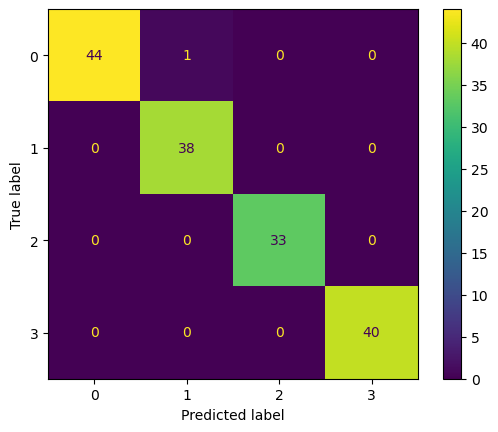

In [719]:
cm=confusion_matrix(y_test,pred)
disp=ConfusionMatrixDisplay(cm)
disp.plot()

In [720]:
from sklearn.linear_model import LogisticRegression

LR_classifier=LogisticRegression(max_iter = 300)

LR_classifier.fit(X=X_train,y=y_train)

pred=LR_classifier.predict(X_test)

print("Accuracy = {} % ".format(accuracy_score(y_test,pred)*100))

Accuracy = 99.35897435897436 % 


D:\PROGRAMS\conda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [721]:
import pickle
import os 
model_filepath = r"Saved_models\LR_classifier.pkl"
os.makedirs(os.path.dirname(model_filepath), exist_ok=True)
with open(model_filepath, 'wb') as f:
     pickle.dump(LR_classifier, f)



model_filepath = r"Saved_models\svm_classifier.pkl"
os.makedirs(os.path.dirname(model_filepath), exist_ok=True)
with open(model_filepath, 'wb') as f:
     pickle.dump(svm_classifier, f)

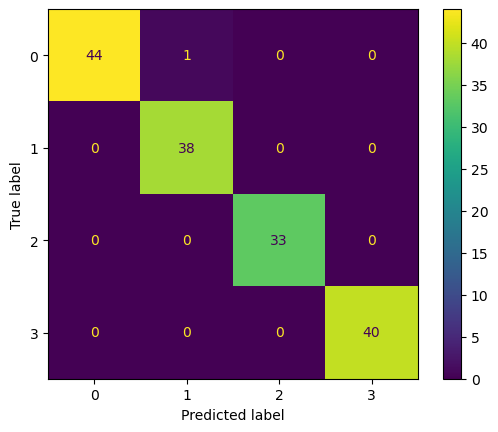

In [722]:
cm=confusion_matrix(y_test,pred)
disp=ConfusionMatrixDisplay(cm)
disp.plot()

In [723]:


def concatText(input_string):
    listString = list(input_string)
    index = listString.index("Diagnose:")
    listString.insert(index, "")
    index = listString.index("Hemodynamics:")
    listString.insert(index, "")
    index = listString.index("Therapy:")
    listString.insert(index, "")
    result_variable = "\n".join(listString)
    return result_variable


def pressed_button():
    selected_model = model_var.get()
    
    if not selected_model:  # Check if no model is selected
        output_text.config(state="normal")
        output_text.delete(1.0, tk.END)
        output_text.insert(tk.END, "No model selected")
        output_text.config(state="disabled")
        return
    
    
    file_path = filedialog.askopenfilename()#     dialog file path
    #==================================
    #np.load lel signal
    loaded_data = np.loadtxt(file_path)
    #==================================
    
    elements = identify(loaded_data,selected_model)
    if elements == -1:
        output_text.config(state="normal",font=48,foreground="red")
        output_text.delete(1.0, tk.END)  #
        content = "Not Identified"
        output_text.insert(tk.END, content)
        output_text.config(state="disabled")
    else:
        content = df_info[elements]['comments']
        content = concatText(content)
        output_text.config(state="normal")
        output_text.delete(1.0, tk.END)  # Clear previous content
        output_text.insert(tk.END, content)
        # Configure tags for each section with different colors
        output_text.tag_configure("header", foreground="blue")
        output_text.tag_configure("diagnose", foreground="green")
        output_text.tag_configure("hemodynamics", foreground="orange")
        output_text.tag_configure("therapy", foreground="purple")
        # Apply tags to the corresponding sections
        output_text.tag_add("header", "1.0", "4.0")
        output_text.tag_add("diagnose", "5.0", "16.0")
        output_text.tag_add("hemodynamics", "16.0", "40.0")
        output_text.tag_add("therapy", "40.0", "80.0")
        output_text.config(state="disabled")
    


# def open_file(file_path):
#     if file_path:
#         with open(file_path, 'r') as file:
#             # Skip the first 17 lines
#             for _ in range(17):
#                 next(file)
#             # Read the rest of the content
#             content = file.read()
#             output_text.config(state="normal")
#             output_text.delete(1.0, tk.END)  # Clear previous content
#             output_text.insert(tk.END, content)
#             # Configure tags for each section with different colors
#             output_text.tag_configure("header", foreground="blue")
#             output_text.tag_configure("diagnose", foreground="green")
#             output_text.tag_configure("hemodynamics", foreground="orange")
#             output_text.tag_configure("therapy", foreground="purple")
#             # Apply tags to the corresponding sections
#             output_text.tag_add("header", "1.0", "4.0")
#             output_text.tag_add("diagnose", "5.0", "16.0")
#             output_text.tag_add("hemodynamics", "16.0", "40.0")
#             output_text.tag_add("therapy", "40.0", "80.0")
#             output_text.config(state="disabled")

root = tk.Tk()
root.title("ECG Identifier")

background_color = '#F5F5F5'  # Light gray
button_color = '#4285F4'  # Blue
button_text_color = 'blue'
text_color = '#333333'  # Dark gray

style = ttk.Style()
style.configure('TButton', padding=5, relief='flat', background=button_color, foreground=button_text_color)

screen_width = root.winfo_screenwidth()
screen_height = root.winfo_screenheight()

window_width = 500
window_height = 400

x_position = (screen_width - window_width) // 2
y_position = (screen_height - window_height) // 2

root.geometry(f"{window_width}x{window_height}+{x_position}+{y_position}")

button_frame = ttk.Frame(root)
button_frame.pack(pady=10)

open_button = ttk.Button(button_frame, text="Open File", command=pressed_button)
open_button.pack()

# Combo box for selecting models
model_var = tk.StringVar()
model_combobox = ttk.Combobox(root, textvariable=model_var, values=["Model 1", "Model 2"], state="readonly")
model_combobox.pack(padx=10, pady=10, side="top")

output_text = tk.Text(root, wrap="word", height=20, width=80)
output_text.pack(padx=10, pady=10, side="right")
output_text.config(state="disabled", background=background_color, foreground=text_color, font=('Arial', 10))

root.mainloop()

In [724]:
def elements_probabilty(arr):
    size = len(arr)  
    element_count = {}
    for element in arr:
        if element in element_count:
            element_count[element] += 1  
        else:
            element_count[element] = 1  
    
    for key, value in element_count.items():
        element_count[key] = (value / size) * 100
    return element_count

In [725]:
def modelPredict(signalTest,selected_model):
    pred = -1
    index_=-1
    if selected_model == "Model 1":
        model = load_model(r"Saved_models\LR_classifier.pkl")
    elif selected_model == "Model 2":
        model = load_model(r"Saved_models\svm_classifier.pkl")
    integrated_signal,peaks,df=find_fidu(signalTest,1000,index_)
    pred=model.predict(df.values)
    return pred

In [726]:
def identify(signalTest,selected_model,threshold=50):
    elements = modelPredict(signalTest,selected_model)
    prob = elements_probabilty(elements)
    for key, value in prob.items():
        if prob[key] > threshold:
            return key  

    return -1